<a href="https://colab.research.google.com/github/ChristianTrummer99/orbital-mechanics/blob/master/HW3_ORBITAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy.matlib 
import numpy as np 
import math as m
import matplotlib.pyplot as plt

In [0]:
#Problem 1

R = 3390 
m_mars = 6.39e23
G = 6.67e-11/1e9
altp = 500
rp = R + altp
P = 8.6322*3600
nu1 = m.radians(260)
nu2 = m.radians(35)
mu = m_mars*G

#find a 
a = (P**2*mu/(4*(m.pi)**2))**(1/3)

#use a to find e
e = 1 - rp/a

#use e to find E at each position
E1 = 2*m.atan(m.sqrt((1-e)/(1+e))*m.tan(nu1/2))
E2 = 2*m.atan(m.sqrt((1-e)/(1+e))*m.tan(nu2/2))

t1 = P/(2*m.pi)*(E1 - e*m.sin(E1))
t2 = P/(2*m.pi)*(E2 - e*m.sin(E2))

print('time to go from nu1 to nu2 = ',abs(t2-t1), 'seconds') 


time to go from nu1 to nu2 =  3148.592106218108 seconds


In [0]:
#Problem 2 

t3 = t2 + 2*3600
Me3 = m.pi*2/P*t3

#use newtons iteration to find E
def E(eccentricity, Me):
    if Me > np.pi:
        E = Me - eccentricity / 2
    else:
        E = Me + eccentricity / 2
    
    E_rad = E
    Me_rad = Me
    precision = 1e-5
    
    ratio = 1
    
    while abs(ratio) > precision:
        ratio = (E_rad - eccentricity * np.sin(E_rad) - Me_rad) / (1 - eccentricity * np.cos(E_rad))
        E_rad = E_rad - ratio
    
    return E_rad
  
E3 = E(e,Me3)

nu3 = 2*m.atan(m.sqrt((1+e)/(1-e))*m.tan(E3/2))

r = (a*m.cos(E3) - a*e)/(m.cos(nu3))

# p = a*(1 - e**2)
# r = p*(1/(1 + e*m.cos(nu3)))

alt3 = r - R
print('the altitude of the satellite  =', alt3, 'km')

the altitude of the satellite  = 9936.687483212321 km


In [0]:
#Problem 3 

se = 0
h = 7e4

r_impact = 6378
mu = 398600
p = h**2/mu
rp = h**2/(2*mu)
e = (p - rp)/rp

nu = m.acos((p/r_impact - 1)/e)

t = (.5*m.tan(nu/2) + (1/6)*(m.tan(nu/2))**3)*p*h/mu
print('time of impact before perigee = ',t,'seconds')



time of impact before perigee =  212.10786177179884 seconds


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


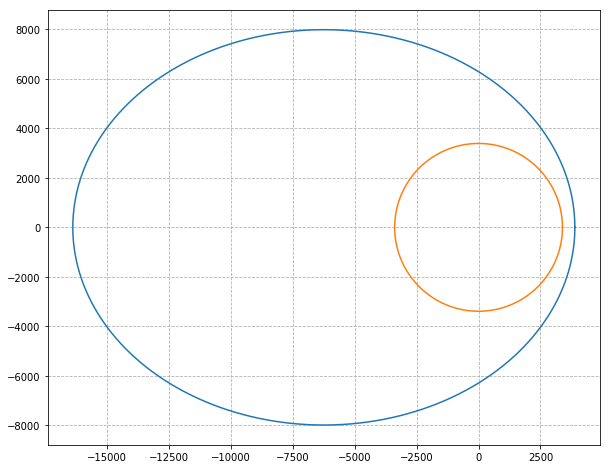

In [0]:
# Problem 4


R = 3390 
m_mars = 6.39e23
G = 6.67e-11/1e9
altp = 500
rp = R + altp
P = 8.6322*3600
nu1 = m.radians(260)
nu2 = m.radians(35)
mu = m_mars*G

#find a 
a = (P**2*mu/(4*(m.pi)**2))**(1/3)

#use a to find e
e = 1 - rp/a

def r(t, e, P):
   Me = 2 * np.pi / P * t
   E_sat = E(e, Me)
   nu = 2 * m.atan(m.tan(E_sat / 2) * ((1 - e) / (1 + e)) ** -.5)
   r_1 = a * (m.cos(E_sat) - e) / m.cos(nu)
   return r_1, nu

t_interval = np.linspace(0,P,1e4)
r_sat = np.zeros(len(t_interval))

nu_sat = np.zeros(len(t_interval))

for i in range(0,len(t_interval)):
    r_sat[i], nu_sat[i]=r(t_interval[i],e,P)


theta = np.linspace(0, 2*np.pi, 100)


x1 = R*np.cos(theta)
x2 = R*np.sin(theta)

fig, ax = plt.subplots(1)

ax.plot(r_sat*np.cos(nu_sat),r_sat*np.sin(nu_sat))
ax.plot(x1, x2)
ax.set_aspect(1)

plt.grid(linestyle='--')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()